# Training the ML Model for Forecasting Fuel Load in Mid-Latitudes
This notebooks demonstrates training a CatBoost model with hyperparameter optimization, followed by feature importance visualization using SHAP. CatBoost is a machine learning algorithm that uses gradient boosting on decision trees. This notebook utilizes the `deepfuel-ML/src/models/catboost_module.py` script for model training.

In [1]:
import os
import pandas as pd
import numpy as np
from joblib import dump, load
import shap

### Data directory

In [2]:
# The training, validation and test set required for model training are placed in data/midlats/
! tree ../data/midlats

../data/midlats
├── midlats_test.csv
├── midlats_train.csv
└── midlats_val.csv

0 directories, 3 files


### Input Features

- Latitude
- Longitude
- Leaf Area Index
- Fire Weather Index: fwinx
- Drought Code: drtcode
- Fire Danegr Severity Rating: fdsrte
- Fraction of Burnable Area: fraction_of_burnable_area
- d2m
- Evaporation Rate: erate
- fg10
- si10
- Volumetric Soil Water Level 1: swvl1
- 2m Temperature: t2m
- tprate
- Climatic Region: climatic_region
- Slope: slor
- Month: month
- Fuel Load: actual_load (target variable)

In [3]:
# Check header of training set matches input features
! head -n 1 ../data/midlats/midlats_train.csv

latitude,longitude,LAI,fwinx,drtcode,fdsrte,fraction_of_burnable_area,d2m,erate,fg10,si10,swvl1,t2m,tprate,climatic_region,slor,actual_load,month


### Model Training

In [4]:
!python '../src/train.py'  --model_name 'CatBoost' --data_path '../data/midlats/' --exp_name 'CatBoost_exp'

Link for the created Neptune experiment--------
Info (NVML): NVML Shared Library Not Found. GPU usage metrics may not be reported. For more information, see https://docs.neptune.ai/logging-and-managing-experiment-results/logging-experiment-data.html#hardware-consumption 
https://ui.neptune.ai/shared/step-by-step-monitoring-experiments-live/e/STEP-163
---------------------------------------
0:	learn: 0.9193915	test: 0.9374665	best: 0.9374665 (0)	total: 78.9ms	remaining: 1m 18s
1:	learn: 0.8572337	test: 0.8807920	best: 0.8807920 (1)	total: 90.4ms	remaining: 45.1s
2:	learn: 0.8133704	test: 0.8472102	best: 0.8472102 (2)	total: 105ms	remaining: 34.9s
3:	learn: 0.7751241	test: 0.8134123	best: 0.8134123 (3)	total: 119ms	remaining: 29.6s
4:	learn: 0.7455154	test: 0.7849642	best: 0.7849642 (4)	total: 134ms	remaining: 26.7s
5:	learn: 0.7227938	test: 0.7619387	best: 0.7619387 (5)	total: 147ms	remaining: 24.3s
6:	learn: 0.7055213	test: 0.7447424	best: 0.7447424 (6)	total: 163ms	remaining: 23.1s
7:

91:	learn: 0.5486241	test: 0.6406052	best: 0.6395742 (84)	total: 1.32s	remaining: 13s
92:	learn: 0.5480591	test: 0.6406532	best: 0.6395742 (84)	total: 1.33s	remaining: 13s
93:	learn: 0.5473953	test: 0.6411729	best: 0.6395742 (84)	total: 1.35s	remaining: 13s
94:	learn: 0.5468666	test: 0.6415633	best: 0.6395742 (84)	total: 1.36s	remaining: 13s
95:	learn: 0.5462115	test: 0.6414436	best: 0.6395742 (84)	total: 1.38s	remaining: 13s
96:	learn: 0.5455693	test: 0.6413580	best: 0.6395742 (84)	total: 1.39s	remaining: 12.9s
97:	learn: 0.5447146	test: 0.6402778	best: 0.6395742 (84)	total: 1.41s	remaining: 12.9s
98:	learn: 0.5439812	test: 0.6400376	best: 0.6395742 (84)	total: 1.42s	remaining: 12.9s
99:	learn: 0.5433613	test: 0.6386501	best: 0.6386501 (99)	total: 1.43s	remaining: 12.9s
100:	learn: 0.5427270	test: 0.6371365	best: 0.6371365 (100)	total: 1.45s	remaining: 12.9s
101:	learn: 0.5419119	test: 0.6369784	best: 0.6369784 (101)	total: 1.46s	remaining: 12.9s
102:	learn: 0.5413588	test: 0.6371566	

185:	learn: 0.5056226	test: 0.6346660	best: 0.6346355 (171)	total: 2.58s	remaining: 11.3s
186:	learn: 0.5051076	test: 0.6344435	best: 0.6344435 (186)	total: 2.59s	remaining: 11.3s
187:	learn: 0.5047361	test: 0.6342807	best: 0.6342807 (187)	total: 2.6s	remaining: 11.3s
188:	learn: 0.5042438	test: 0.6341121	best: 0.6341121 (188)	total: 2.62s	remaining: 11.2s
189:	learn: 0.5036811	test: 0.6340671	best: 0.6340671 (189)	total: 2.63s	remaining: 11.2s
190:	learn: 0.5033368	test: 0.6342036	best: 0.6340671 (189)	total: 2.65s	remaining: 11.2s
191:	learn: 0.5030719	test: 0.6341809	best: 0.6340671 (189)	total: 2.66s	remaining: 11.2s
192:	learn: 0.5027323	test: 0.6340040	best: 0.6340040 (192)	total: 2.68s	remaining: 11.2s
193:	learn: 0.5025179	test: 0.6339426	best: 0.6339426 (193)	total: 2.69s	remaining: 11.2s
194:	learn: 0.5022590	test: 0.6338549	best: 0.6338549 (194)	total: 2.7s	remaining: 11.1s
195:	learn: 0.5018524	test: 0.6341440	best: 0.6338549 (194)	total: 2.71s	remaining: 11.1s
196:	learn: 

277:	learn: 0.4741012	test: 0.6312829	best: 0.6312500 (265)	total: 3.83s	remaining: 9.95s
278:	learn: 0.4738183	test: 0.6315227	best: 0.6312500 (265)	total: 3.84s	remaining: 9.93s
279:	learn: 0.4734000	test: 0.6317994	best: 0.6312500 (265)	total: 3.86s	remaining: 9.92s
280:	learn: 0.4730999	test: 0.6316118	best: 0.6312500 (265)	total: 3.87s	remaining: 9.9s
281:	learn: 0.4728645	test: 0.6316737	best: 0.6312500 (265)	total: 3.89s	remaining: 9.9s
282:	learn: 0.4727056	test: 0.6316947	best: 0.6312500 (265)	total: 3.9s	remaining: 9.87s
283:	learn: 0.4723643	test: 0.6316039	best: 0.6312500 (265)	total: 3.91s	remaining: 9.85s
284:	learn: 0.4722228	test: 0.6316106	best: 0.6312500 (265)	total: 3.92s	remaining: 9.83s
285:	learn: 0.4718643	test: 0.6310680	best: 0.6310680 (285)	total: 3.93s	remaining: 9.82s
286:	learn: 0.4715775	test: 0.6312893	best: 0.6310680 (285)	total: 3.95s	remaining: 9.8s
287:	learn: 0.4712310	test: 0.6316549	best: 0.6310680 (285)	total: 3.96s	remaining: 9.79s
288:	learn: 0.

The training logs can be viewed live online at the following link: https://ui.neptune.ai/shared/step-by-step-monitoring-experiments-live/e/STEP-158

### Loading the trained model

In [5]:
model = load('../src/results/pre-trained_models/CatBoost.joblib')

### Feature importance using SHAP
[SHAP](https://github.com/slundberg/shap) (SHapley Additive exPlanations) is used to explain the output of the trained machine learning model.

In [6]:
midlat_train = pd.read_csv('../data/midlats/midlats_train.csv')

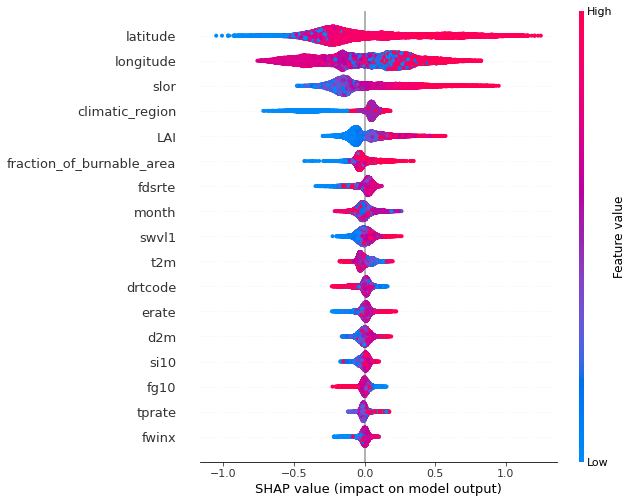

In [7]:
shap_values = shap.TreeExplainer(model).shap_values(midlat_train.drop([ 'actual_load'], axis=1))
shap.summary_plot(shap_values, midlat_train.drop(['actual_load'], axis=1))

The y-axis indicates the variable name, in order of importance from top to bottom.
On the x-axis (Impact on model output), the horizontal location shows whether the effect of that value is associated with a higher or lower prediction. Gradient colour indicates feature value.